# [ 머신러닝 ]

## [ 선형 회귀 (Linear Regression) ]

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## [ 아이리스 데이터 불러오기 ]

In [57]:
from sklearn.datasets import load_iris
iris = load_iris()

In [58]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [59]:
display(iris.data.shape, iris.target, iris.target_names, iris.feature_names)

(150, 4)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

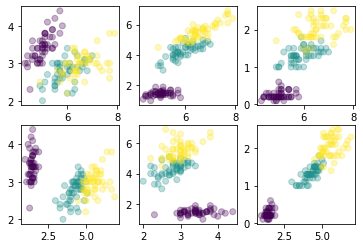

In [60]:
plt.subplot(2, 3, 1)
plt.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target, alpha=0.3)

plt.subplot(2, 3, 2)
plt.scatter(iris.data[:, 0], iris.data[:, 2], c=iris.target, alpha=0.3)

plt.subplot(2, 3, 3)
plt.scatter(iris.data[:, 0], iris.data[:, 3], c=iris.target, alpha=0.3)

plt.subplot(2, 3, 4)
plt.scatter(iris.data[:, 2], iris.data[:, 1], c=iris.target, alpha=0.3)

plt.subplot(2, 3, 5)
plt.scatter(iris.data[:, 1], iris.data[:, 2], c=iris.target, alpha=0.3)

plt.subplot(2, 3, 6)
plt.scatter(iris.data[:, 2], iris.data[:, 3], c=iris.target, alpha=0.3)

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1,
       0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2,
       0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.2, 0.2, 0.2, 0.1, 0.2,
       0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2, 1.4, 1.5,
       1.5, 1.3, 1.5, 1.3, 1.6, 1. , 1.3, 1.4, 1. , 1.5, 1. , 1.4, 1.3,
       1.4, 1.5, 1. , 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7,
       1.5, 1. , 1.1, 1. , 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3, 1.3, 1.2,
       1.4, 1.2, 1. , 1.3, 1.2, 1.3, 1.3, 1.1, 1.3, 2.5, 1.9, 2.1, 1.8,
       2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2. , 1.9, 2.1, 2. , 2.4, 2.3, 1.8,
       2.2, 2.3, 1.5, 2.3, 2. , 2. , 1.8, 2.1, 1.8, 1.8, 1.8, 2.1, 1.6,
       1.9, 2. , 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8, 2.1, 2.4, 2.3, 1.9,
       2.3, 2.5, 2.3, 1.9, 2. , 2.3, 1.8])

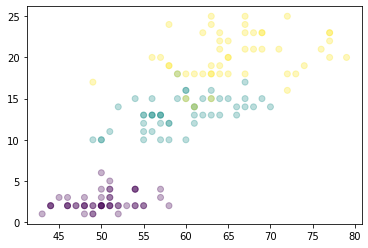

In [61]:
plt.scatter(iris.data[:, 0] * 10, iris.data[:, 3] * 10, c=iris.target, alpha=0.3)
display(iris.data[:, 0], iris.data[:, 3])

## [ 선형 회귀 적용해 보기 ]

In [62]:
X = iris.data[:, 2] # 입력값
y = iris.data[:, 3] # 목표값

display(X, y)

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.4, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 4.7, 4.5,
       4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. , 4.7, 3.6,
       4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4, 4.8, 5. ,
       4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4. , 4.4,
       4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1, 6. , 5.1, 5.9, 5.6,
       5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5. , 5.1, 5.3, 5.5,
       6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. , 4.8, 4.9, 5.6, 5.8,
       6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1,
       5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1,
       0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2,
       0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.2, 0.2, 0.2, 0.1, 0.2,
       0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2, 1.4, 1.5,
       1.5, 1.3, 1.5, 1.3, 1.6, 1. , 1.3, 1.4, 1. , 1.5, 1. , 1.4, 1.3,
       1.4, 1.5, 1. , 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7,
       1.5, 1. , 1.1, 1. , 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3, 1.3, 1.2,
       1.4, 1.2, 1. , 1.3, 1.2, 1.3, 1.3, 1.1, 1.3, 2.5, 1.9, 2.1, 1.8,
       2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2. , 1.9, 2.1, 2. , 2.4, 2.3, 1.8,
       2.2, 2.3, 1.5, 2.3, 2. , 2. , 1.8, 2.1, 1.8, 1.8, 1.8, 2.1, 1.6,
       1.9, 2. , 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8, 2.1, 2.4, 2.3, 1.9,
       2.3, 2.5, 2.3, 1.9, 2. , 2.3, 1.8])

In [63]:
# X(입력값)은 항상 2차원 행렬이어야 한다.
# X 값으로 y를 맞출려고 한다.

X = iris.data[:, [2]]

In [64]:
X.shape, y.shape

((150, 1), (150,))

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
model = LinearRegression() # Regression --> 회귀
model.fit(X, y) # 훈련
y_pred = model.predict(X) # X로 y예측, predict --> 예측하다
print(y_pred)

[0.21898206 0.21898206 0.17740652 0.2605576  0.21898206 0.34370869
 0.21898206 0.2605576  0.21898206 0.2605576  0.2605576  0.30213314
 0.21898206 0.09425544 0.13583098 0.2605576  0.17740652 0.21898206
 0.34370869 0.2605576  0.34370869 0.2605576  0.0526799  0.34370869
 0.42685977 0.30213314 0.30213314 0.2605576  0.21898206 0.30213314
 0.30213314 0.2605576  0.2605576  0.21898206 0.2605576  0.13583098
 0.17740652 0.21898206 0.17740652 0.2605576  0.17740652 0.17740652
 0.17740652 0.30213314 0.42685977 0.21898206 0.30213314 0.21898206
 0.2605576  0.21898206 1.59097494 1.50782385 1.67412602 1.29994614
 1.54939939 1.50782385 1.59097494 1.00891735 1.54939939 1.2583706
 1.09206844 1.38309723 1.29994614 1.59097494 1.13364398 1.46624831
 1.50782385 1.34152169 1.50782385 1.2583706  1.63255048 1.29994614
 1.67412602 1.59097494 1.42467277 1.46624831 1.63255048 1.71570156
 1.50782385 1.09206844 1.21679506 1.17521952 1.2583706  1.7572771
 1.50782385 1.50782385 1.59097494 1.46624831 1.34152169 1.299946

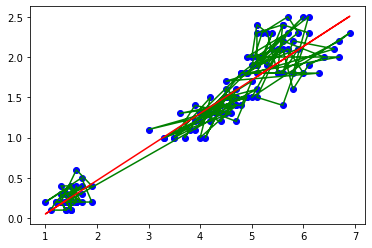

In [67]:
plt.scatter(X[:, 0], y, c='b') # 원본 데이터
plt.plot(X[:, 0], y, 'g') # 그냥 넣어본 것
plt.plot(X[:, 0], y_pred, 'r') # 예측 데이터

(0.705, 7.195, -0.06996795279057898, 2.628284699336572)

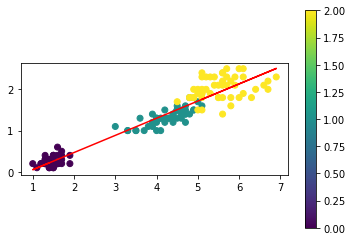

In [68]:
plt.scatter(X[:, 0], y, c=iris.target) # 원본 데이터
plt.plot(X[:, 0], y_pred, 'r') # 예측 데이터
plt.colorbar()
plt.axis('scaled') # 단위를 같게 한다..

In [78]:
# 대한민국 GDP 를 이용한 미래 값 예측하기

s = np.array([[159069],[160558],[165470],[166535],[172146],[176636],[179424]])
K = np.array([[1],[2],[3],[4],[5],[6],[7]])
model = LinearRegression() # Regression --> 회귀
model.fit(K, s) # 훈련

y_pred = model.predict([[120]])
print(y_pred)

[[582407.28571429]]
